# DNA Center

Exam Topics Covered: 
3.6 Construct a Python script using the Cisco DNA center APIs to retrieve and display wireless health information

Cisco DNA Center implements a REST API which supports GET, PUT, POST, and DELETE. The API documentation is located here:
https://developer.cisco.com/docs/dna-center/#!cisco-dna-center-platform-overview/cisco-dna-center-platform-overview

## Authentication
To authenticate to the DNAC API, you must first retrieve a token by issuing a post request using HTTP Basic authentication with you userid and password. The token will be returned in a field called `Token` in the JSON body of the response.  The token must then be added to a header field called `X-Auth-Token` to be included with all subsequent requests.  

```
import requests
from requests.auth import HTTPBasicAuth

username = "devnetuser"
password = "Cisco123!"
hostname = "sandboxdnac2.cisco.com"

headers = {"Content-Type": "application/json"}

auth = HTTPBasicAuth(username, password)

login_url = f"https://{hostname}/dna/system/api/v1/auth/token"

resp = requests.post(login_url, headers=headers, auth=auth)
token = resp.json()['Token']

headers['X-Auth-Token'] = token
```
> Notice that the request for the token is a POST, rather than a GET.  

## Retrieving Wireless Health Information

There is an overall Network Health API call using the `network-health` endpoint, and information can be retrieved for wireless clients using the `client-health` and `client-detail` endpoints.  A optional timestamp can be specified for each to indicate for what time period the health data is being requested.  The timestamp must be in epoch time in milliseconds, which can be calculated using the Python `time` module and multiplying by 1000.  It must be passed into the request as a query parameter,  which can be accomplished using the `params` argument of the Python requests module.  Below are example requests and responses of each of these API calls. 

### Network Health API

```
url = f"https://{hostname}/dna/intent/api/v1/network-health"
resp = requests.get(url, headers=headers, auth=auth)

{
  "response": [
    {
      "siteId": "global",
      "scoreDetail": [
        {
          "scoreCategory": {
            "scoreCategory": "CLIENT_TYPE",
            "value": "ALL"
          },
          "scoreValue": 29,
          "clientCount": 82,
          "clientUniqueCount": 82,
          "starttime": 1593357780000,
          "endtime": 1593358080000
        },
        {
          "scoreCategory": {
            "scoreCategory": "CLIENT_TYPE",
            "value": "WIRED"
          },
          "scoreValue": 100,
          "clientCount": 2,
          "clientUniqueCount": 2,
          "starttime": 1593357780000,
          "endtime": 1593358080000,
          "scoreList": [
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "POOR"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "FAIR"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "GOOD"
              },
              "scoreValue": -1,
              "clientCount": 2,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000,
              "scoreList": [
                {
                  "scoreCategory": {
                    "scoreCategory": "deviceType",
                    "value": "ALL"
                  },
                  "scoreValue": -1,
                  "clientCount": 2,
                  "clientUniqueCount": null,
                  "starttime": 1593357780000,
                  "endtime": 1593358080000
                }
              ]
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "IDLE"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "NODATA"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "NEW"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            }
          ]
        },
        {
          "scoreCategory": {
            "scoreCategory": "CLIENT_TYPE",
            "value": "WIRELESS"
          },
          "scoreValue": 28,
          "clientCount": 80,
          "clientUniqueCount": 80,
          "starttime": 1593357780000,
          "endtime": 1593358080000,
          "scoreList": [
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "POOR"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "FAIR"
              },
              "scoreValue": -1,
              "clientCount": 58,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000,
              "scoreList": [
                {
                  "scoreCategory": {
                    "scoreCategory": "deviceType",
                    "value": "ALL"
                  },
                  "scoreValue": -1,
                  "clientCount": 58,
                  "clientUniqueCount": null,
                  "starttime": 1593357780000,
                  "endtime": 1593358080000
                }
              ]
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "GOOD"
              },
              "scoreValue": -1,
              "clientCount": 22,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000,
              "scoreList": [
                {
                  "scoreCategory": {
                    "scoreCategory": "deviceType",
                    "value": "ALL"
                  },
                  "scoreValue": -1,
                  "clientCount": 22,
                  "clientUniqueCount": null,
                  "starttime": 1593357780000,
                  "endtime": 1593358080000
                }
              ]
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "IDLE"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "NODATA"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            },
            {
              "scoreCategory": {
                "scoreCategory": "SCORE_TYPE",
                "value": "NEW"
              },
              "scoreValue": -1,
              "clientCount": 0,
              "clientUniqueCount": 0,
              "starttime": 1593357780000,
              "endtime": 1593358080000
            }
          ]
        }
      ]
    }
  ]
}
```

### Client Health API

```
url = f"https://{hostname}/dna/intent/api/v1/client-health"
resp = requests.get(url, headers=headers, auth=auth)


for item in resp.json()['response']:
     for score in item['scoreDetail']:
         if score['scoreCategory']['value'] == "WIRELESS":
             pprint(score, indent=2)


{ 'clientCount': 80,
  'clientUniqueCount': 80,
  'endtime': 1593358080000,
  'scoreCategory': {'scoreCategory': 'CLIENT_TYPE', 'value': 'WIRELESS'},
  'scoreList': [ { 'clientCount': 0,
                   'clientUniqueCount': 0,
                   'endtime': 1593358080000,
                   'scoreCategory': { 'scoreCategory': 'SCORE_TYPE',
                                      'value': 'POOR'},
                   'scoreValue': -1,
                   'starttime': 1593357780000},
                 { 'clientCount': 58,
                   'clientUniqueCount': 0,
                   'endtime': 1593358080000,
                   'scoreCategory': { 'scoreCategory': 'SCORE_TYPE',
                                      'value': 'FAIR'},
                   'scoreList': [ { 'clientCount': 58,
                                    'clientUniqueCount': None,
                                    'endtime': 1593358080000,
                                    'scoreCategory': { 'scoreCategory': 'deviceType',
                                                       'value': 'ALL'},
                                    'scoreValue': -1,
                                    'starttime': 1593357780000}],
                   'scoreValue': -1,
                   'starttime': 1593357780000},
                 { 'clientCount': 22,
                   'clientUniqueCount': 0,
                   'endtime': 1593358080000,
                   'scoreCategory': { 'scoreCategory': 'SCORE_TYPE',
                                      'value': 'GOOD'},
                   'scoreList': [ { 'clientCount': 22,
                                    'clientUniqueCount': None,
                                    'endtime': 1593358080000,
                                    'scoreCategory': { 'scoreCategory': 'deviceType',
                                                       'value': 'ALL'},
                                    'scoreValue': -1,
                                    'starttime': 1593357780000}],
                   'scoreValue': -1,
                   'starttime': 1593357780000},
                 { 'clientCount': 0,
                   'clientUniqueCount': 0,
                   'endtime': 1593358080000,
                   'scoreCategory': { 'scoreCategory': 'SCORE_TYPE',
                                      'value': 'IDLE'},
                   'scoreValue': -1,
                   'starttime': 1593357780000},
                 { 'clientCount': 0,
                   'clientUniqueCount': 0,
                   'endtime': 1593358080000,
                   'scoreCategory': { 'scoreCategory': 'SCORE_TYPE',
                                      'value': 'NODATA'},
                   'scoreValue': -1,
                   'starttime': 1593357780000},
                 { 'clientCount': 0,
                   'clientUniqueCount': 0,
                   'endtime': 1593358080000,
                   'scoreCategory': { 'scoreCategory': 'SCORE_TYPE',
                                      'value': 'NEW'},
                   'scoreValue': -1,
                   'starttime': 1593357780000}],
  'scoreValue': 28,
  'starttime': 1593357780000}
```

### Client Detail API
For the Client Detail API,  both a MAC address and timestamp are required. Client Health Scores are on a scale from 1 to 10, with 10 being the best.  

```
from time import time

url = f"https://{hostname}/dna/intent/api/v1/client-detail"
params = {"macAddress": "00:00:2A:01:00:13", "timestamp": int(time() * 1000)}
resp = requests.get(url, auth=auth, headers=headers, params=params)

pprint(resp.json(), indent=4)
{   'connectionInfo': {   'band': '2.4',
                          'channel': '1',
                          'channelWidth': '20',
                          'hostType': 'WIRELESS',
                          'nwDeviceMac': '00:2B:01:00:04:00',
                          'nwDeviceName': 'T1-3',
                          'protocol': '802.11b/g',
                          'spatialStream': '0',
                          'timestamp': 1593359981080,
                          'uapsd': 'Disabled',
                          'wmm': 'Unsupported'},
    'detail': {   'apGroup': 'Floor17_TYPICAL_0cc7b',
                  'authType': None,
                  'avgRssi': '-81.0',
                  'avgSnr': '20.0',
                  'channel': '1',
                  'clientConnection': 'T1-3',
                  'clientType': 'OLD',
                  'connectedDevice': [   {   'band': None,
                                             'id': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                                             'ip address': None,
                                             'name': None,
                                             'type': None}],
                  'connectionStatus': 'CONNECTED',
                  'dataRate': '0.0',
                  'dnsRequest': '0.0',
                  'dnsResponse': '0.0',
                  'dot11Protocol': 'PROTOCOL_802_11_G',
                  'frequency': '2.4',
                  'healthScore': [   {   'healthType': 'OVERALL',
                                         'reason': '',
                                         'score': 7},
                                     {   'healthType': 'ONBOARDED',
                                         'reason': '',
                                         'score': 4},
                                     {   'healthType': 'CONNECTED',
                                         'reason': '',
                                         'score': 3}],
                  'hostIpV4': '10.10.20.178',
                  'hostMac': '00:00:2A:01:00:13',
                  'hostName': None,
                  'hostOs': None,
                  'hostType': 'WIRELESS',
                  'hostVersion': None,
                  'id': '00:00:2A:01:00:13',
                  'iosCapable': False,
                  'issueCount': 0,
                  'lastUpdated': 1593359760000,
                  'linkSpeed': 0,
                  'location': 'HQ/Floor 17',
                  'onboarding': {   'aaaServerIp': 'N/A',
                                    'assocDoneTime': 1593358402792,
                                    'authDoneTime': 0,
                                    'averageAssocDuration': '1.0',
                                    'averageAuthDuration': '0.0',
                                    'averageDhcpDuration': '0.0',
                                    'averageRunDuration': '1.0',
                                    'dhcpDoneTime': 0,
                                    'dhcpServerIp': 'UNKNOWN',
                                    'latestRootCauseList': ['otherRootCause'],
                                    'maxAssocDuration': '1.0',
                                    'maxAuthDuration': '0.0',
                                    'maxDhcpDuration': '0.0',
                                    'maxRunDuration': '1.0'},
                  'onboardingTime': 1593358402792,
                  'port': None,
                  'remoteEndDuplexMode': None,
                  'rssi': '-81.0',
                  'rxBytes': '80197.0',
                  'rxLinkError': 0,
                  'rxRate': 0,
                  'slotId': 0,
                  'snr': '20.0',
                  'ssid': 'sandbox',
                  'subType': 'Unclassified',
                  'txBytes': '80283.0',
                  'txLinkError': 0,
                  'txRate': 0,
                  'usage': 160480,
                  'userId': None,
                  'versionTime': None,
                  'vlanId': 0,
                  'vnid': 0},
    'topology': {   'links': [   {   'apRadioAdminStatus': None,
                                     'apRadioOperStatus': None,
                                     'id': None,
                                     'label': ['CLIENTDATA'],
                                     'linkStatus': 'UP',
                                     'portUtilization': None,
                                     'source': '00_00_2A_01_00_13',
                                     'sourceAdminStatus': None,
                                     'sourceDuplexInfo': None,
                                     'sourceInterfaceName': None,
                                     'sourceLinkStatus': None,
                                     'sourcePortMode': None,
                                     'sourcePortVLANInfo': None,
                                     'target': 'sandbox',
                                     'targetAdminStatus': None,
                                     'targetDuplexInfo': None,
                                     'targetInterfaceName': None,
                                     'targetLinkStatus': None,
                                     'targetPortMode': None,
                                     'targetPortVLANInfo': None},
                                 {   'apRadioAdminStatus': None,
                                     'apRadioOperStatus': None,
                                     'id': None,
                                     'label': ['CLIENTDATA'],
                                     'linkStatus': 'UP',
                                     'portUtilization': None,
                                     'source': 'sandbox',
                                     'sourceAdminStatus': None,
                                     'sourceDuplexInfo': None,
                                     'sourceInterfaceName': None,
                                     'sourceLinkStatus': None,
                                     'sourcePortMode': None,
                                     'sourcePortVLANInfo': None,
                                     'target': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                                     'targetAdminStatus': None,
                                     'targetDuplexInfo': None,
                                     'targetInterfaceName': None,
                                     'targetLinkStatus': None,
                                     'targetPortMode': None,
                                     'targetPortVLANInfo': None},
                                 {   'apRadioAdminStatus': None,
                                     'apRadioOperStatus': None,
                                     'id': None,
                                     'label': ['CLIENTDATA', 'CAPWAPCTL'],
                                     'linkStatus': 'UP',
                                     'portUtilization': None,
                                     'source': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                                     'sourceAdminStatus': None,
                                     'sourceDuplexInfo': None,
                                     'sourceInterfaceName': None,
                                     'sourceLinkStatus': None,
                                     'sourcePortMode': None,
                                     'sourcePortVLANInfo': None,
                                     'target': '72dc1f0a-e4da-4ec3-a055-822416894dd5',
                                     'targetAdminStatus': None,
                                     'targetDuplexInfo': None,
                                     'targetInterfaceName': None,
                                     'targetLinkStatus': None,
                                     'targetPortMode': None,
                                     'targetPortVLANInfo': None}],
                    'nodes': [   {   'clients': None,
                                     'connectedDevice': None,
                                     'count': None,
                                     'description': 'Client',
                                     'deviceType': 'Unclassified',
                                     'fabricGroup': None,
                                     'family': None,
                                     'healthScore': 7,
                                     'id': '00_00_2A_01_00_13',
                                     'ip': '10.10.20.178',
                                     'ipv6': None,
                                     'level': 0,
                                     'name': None,
                                     'nodeType': 'Interface',
                                     'platformId': None,
                                     'radioFrequency': None,
                                     'role': 'Client',
                                     'softwareVersion': None,
                                     'userId': None},
                                 {   'clients': None,
                                     'connectedDevice': None,
                                     'count': None,
                                     'description': 'SSID',
                                     'deviceType': None,
                                     'fabricGroup': None,
                                     'family': None,
                                     'healthScore': None,
                                     'id': 'sandbox',
                                     'ip': None,
                                     'level': 1,
                                     'name': 'sandbox',
                                     'nodeType': 'NetworkElement',
                                     'platformId': None,
                                     'radioFrequency': '2.4 GHZ',
                                     'role': 'SSID',
                                     'softwareVersion': None,
                                     'userId': None},
                                 {   'clients': 8,
                                     'connectedDevice': None,
                                     'count': None,
                                     'description': 'AP',
                                     'deviceType': 'Cisco 1140 Unified Access '
                                                   'Point',
                                     'fabricGroup': None,
                                     'family': 'Unified AP',
                                     'healthScore': 10,
                                     'id': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                                     'ip': '10.10.20.243',
                                     'level': 2,
                                     'name': 'T1-3',
                                     'nodeType': 'NetworkDevice',
                                     'platformId': 'AIR-AP1141N-A-K9',
                                     'radioFrequency': None,
                                     'role': 'ACCESS',
                                     'softwareVersion': '8.5.97.162',
                                     'userId': None},
                                 {   'clients': 80,
                                     'connectedDevice': None,
                                     'count': None,
                                     'description': 'WLC',
                                     'deviceType': 'Cisco 3504 Wireless LAN '
                                                   'Controller',
                                     'fabricGroup': None,
                                     'family': 'Wireless Controller',
                                     'healthScore': 10,
                                     'id': '72dc1f0a-e4da-4ec3-a055-822416894dd5',
                                     'ip': '10.10.20.51',
                                     'level': 3,
                                     'name': '3504_WLC',
                                     'nodeType': 'NetworkDevice',
                                     'platformId': 'AIR-CT3504-K9',
                                     'radioFrequency': None,
                                     'role': 'ACCESS',
                                     'softwareVersion': '8.8.111.0',
                                     'userId': None}]}}

item = resp.json()['detail']
print(f"RSSI: {item['rssi']}")
print(f"SNR: {item['snr']}")
print(f"Errors: {item['txLinkError']}")

RSSI: -81.0
SNR: 20.0
Errors: 0

for score in resp.json()['detail']['healthScore']:
     print(score)
     
{'healthType': 'OVERALL', 'reason': '', 'score': 7}
{'healthType': 'ONBOARDED', 'reason': '', 'score': 4}
{'healthType': 'CONNECTED', 'reason': '', 'score': 3}



```
Below is a code example of all three API requests. 

In [ ]:
import requests
from requests.auth import HTTPBasicAuth
from urllib.parse import urlencode

username = "devnetuser"
password = "Cisco123!"
hostname = "sandboxdnac2.cisco.com"

headers = {"Content-Type": "application/json"}
# Use Basic Authentication
auth = HTTPBasicAuth(username, password)

# Request URL for the token
login_url = f"https://{hostname}/dna/system/api/v1/auth/token"

# Note this is a POST rather than a GET!
resp = requests.post(login_url, headers=headers, auth=auth)

token = resp.json()['Token']

# Add the token to subsequent requests
headers['X-Auth-Token'] = token

# Get devices
url = f"https://{hostname}/dna/intent/api/v1/network-device"
resp = requests.get(url, headers=headers, auth=auth)
for device in resp.json()['response']:
    print(f"Hostname: {device['hostname']}")
    print(f"Type: {device['type']}")
    print(f"Role: {device['role']}")
    print(f"SN: {device['serialNumber']}\n")

# Overall network health


# Overall client health (timestamp not required, but can provide if desired.
params = {"timestamp": int(time() * 1000 )}
url = f"https://{hostname}/dna/intent/api/v1/client-health"
resp = requests.get(url, headers=headers, auth=auth, params=params)
for item in resp.json()['response']:
    for score in item['scoreDetail']:
        print(score)


# Retrieve and display client details (need a MAC address passed in as a query parameter)
# Timestamp is required, even though API docs do not list it as such!
url = f"https://{hostname}/dna/intent/api/v1/client-detail"
params = {"macAddress": "00:00:2A:01:00:13", "timestamp": int(time() * 1000)}
resp = requests.get(url, auth=auth, headers=headers, params=params)
pprint(resp.json(), indent=4)

item = resp.json()['detail']
print(f"RSSI: {item['rssi']}")
print(f"SNR: {item['snr']}")
print(f"Errors: {item['txLinkError']}")

for score in resp.json()['detail']['healthScore']:
    print(score)

## DNA Center SDK

DNA Center also has an SDK which can be installed using pip:  `pip install dnacentersdk`. The documentation can be found here: https://github.com/cisco-en-programmability/dnacentersdk and https://dnacentersdk.readthedocs.io/en/latest/.  

To use the SDK, first create a DNACenter API object and pass it the username, password, and base_url as arguments. 

```
from dnacentersdk import api

dnac = api.DNACenterAPI(username="devnetuser",
                        password="Cisco123!",
                        base_url="https://sandboxdnac2.cisco.com")
```
> If using a DNAC site without a valid certificate, add `verify=False` after the base_url in the above command.

This creates a DNACenterAPI object:
```
type(dnac)
<class 'dnacentersdk.api.DNACenterAPI'>
```
From this object, you can reference one of the many child objects and their methods. For example,  to query devices you would use the method dnac.devices.get_device_list() method. A number of query parameters are supported and can be passed to the get_device_list method. The methods and query parameters available map very closely to the equivalent native API calls which can be referenced here:  https://developer.cisco.com/docs/dna-center/api/1-3-3-x/

For example, the `get_device_list` method and available query parameters are listed on the above page.  

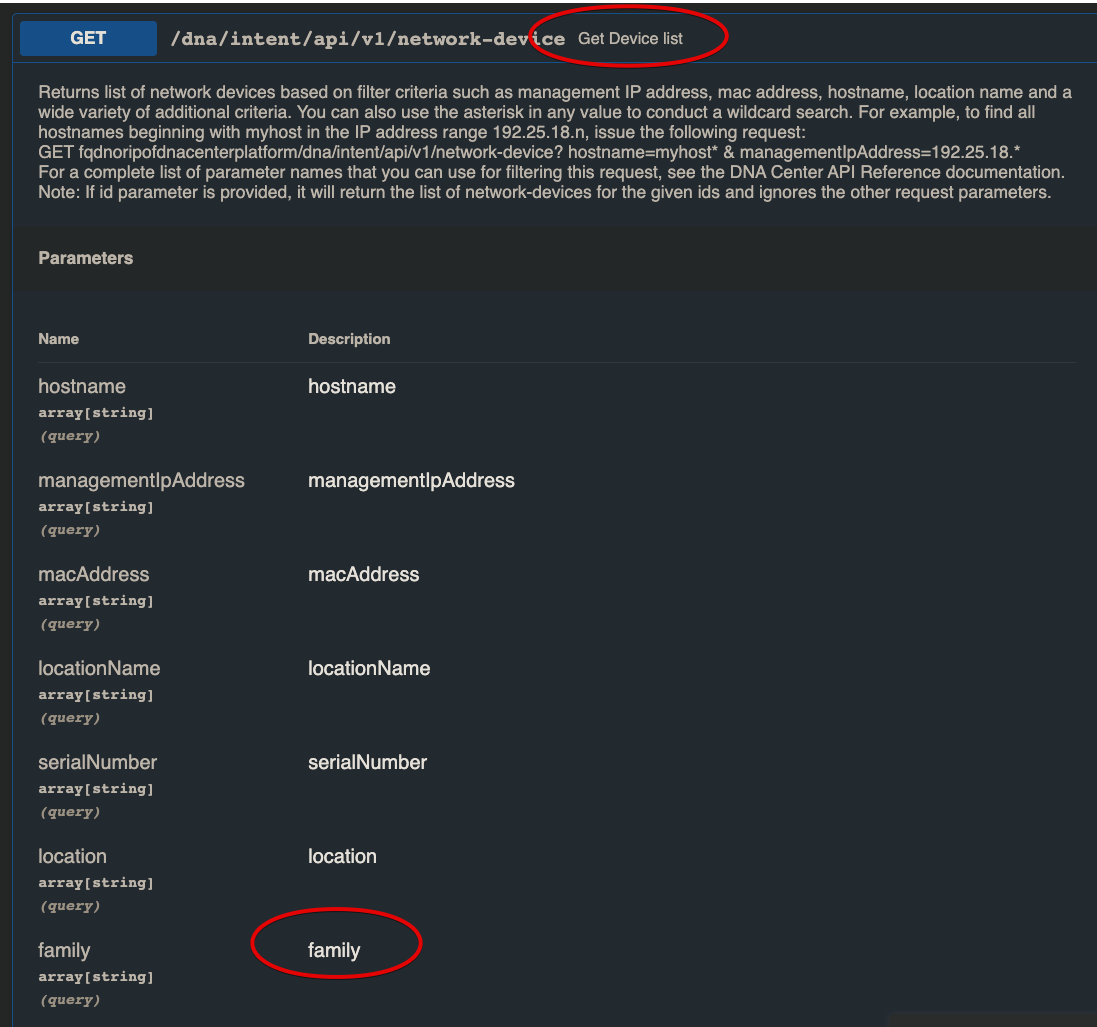

The below example shows an example of getting the list of devices from DNA Center using the SDK. 

```
devices = dnac.devices.get_device_list(family='Switches and Hubs')
```
The devices variable above now contains a JSON list of all devices.

```
pprint(devices)
{'response': [{'apManagerInterfaceIp': '',
               'associatedWlcIp': '',
               'bootDateTime': '2020-02-27 15:30:18',
               'collectionInterval': 'Global Default',
               'collectionStatus': 'Managed',
               'deviceSupportLevel': 'Supported',
               'errorCode': None,
               'errorDescription': None,
               'family': 'Switches and Hubs',
               'hostname': 'leaf1',
               'id': '3dd27ed6-44f9-486d-abaf-a779781431a0',
               'instanceTenantId': '5e5a432575161200cc4ac95c',
               'instanceUuid': '3dd27ed6-44f9-486d-abaf-a779781431a0',
               'interfaceCount': '0',
               'inventoryStatusDetail': '<status><general '
                                        'code="SUCCESS"/></status>',
               'lastUpdateTime': 1593385818629,
               'lastUpdated': '2020-06-28 23:10:18',
               'lineCardCount': '0',
               'lineCardId': '',
               'location': None,
               'locationName': None,
               'macAddress': '00:72:78:54:d1:00',
               'managementIpAddress': '10.10.20.81',
               'memorySize': 'NA',
               'platformId': 'C9300-48U',
               'reachabilityFailureReason': '',
               'reachabilityStatus': 'Reachable',
               'role': 'ACCESS',
               'roleSource': 'AUTO',
               'serialNumber': 'FCW2214L0VK',
               'series': 'Cisco Catalyst 9300 Series Switches',
               'snmpContact': '',
               'snmpLocation': '',
               'softwareType': 'IOS-XE',
               'softwareVersion': '16.6.4a',
               'tagCount': '0',
               'tunnelUdpPort': None,
               'type': 'Cisco Catalyst 9300 Switch',
               'upTime': '122 days, 7:40:49.93',
               'waasDeviceMode': None},
              {'apManagerInterfaceIp': '',
               'associatedWlcIp': '',
               'bootDateTime': '2020-02-27 15:28:48',
               'collectionInterval': 'Global Default',
               'collectionStatus': 'Managed',
               'deviceSupportLevel': 'Supported',
               'errorCode': None,
               'errorDescription': None,
               'family': 'Switches and Hubs',
               'hostname': 'leaf2.abc.inc',
               'id': '5bc5b967-3f83-4195-891c-788f3e9048f3',
               'instanceTenantId': '5e5a432575161200cc4ac95c',
               'instanceUuid': '5bc5b967-3f83-4195-891c-788f3e9048f3',
               'interfaceCount': '0',
               'inventoryStatusDetail': '<status><general '
                                        'code="SUCCESS"/></status>',
               'lastUpdateTime': 1593385428399,
               'lastUpdated': '2020-06-28 23:03:48',
               'lineCardCount': '0',
               'lineCardId': '',
               'location': None,
               'locationName': None,
               'macAddress': '50:61:bf:ec:07:80',
               'managementIpAddress': '10.10.20.82',
               'memorySize': 'NA',
               'platformId': 'C9300-48U',
               'reachabilityFailureReason': '',
               'reachabilityStatus': 'Reachable',
               'role': 'ACCESS',
               'roleSource': 'AUTO',
               'serialNumber': 'FCW2214L0UZ',
               'series': 'Cisco Catalyst 9300 Series Switches',
               'snmpContact': '',
               'snmpLocation': '',
               'softwareType': 'IOS-XE',
               'softwareVersion': '16.6.4a',
               'tagCount': '0',
               'tunnelUdpPort': None,
               'type': 'Cisco Catalyst 9300 Switch',
               'upTime': '122 days, 7:35:04.32',
               'waasDeviceMode': None},
              {'apManagerInterfaceIp': '',
               'associatedWlcIp': '',
               'bootDateTime': '2020-02-12 19:00:53',
               'collectionInterval': 'Global Default',
               'collectionStatus': 'Managed',
               'deviceSupportLevel': 'Supported',
               'errorCode': None,
               'errorDescription': None,
               'family': 'Switches and Hubs',
               'hostname': 'spine1.abc.inc',
               'id': '2f0b7d3b-c9e1-491e-a584-f272b5403719',
               'instanceTenantId': '5e5a432575161200cc4ac95c',
               'instanceUuid': '2f0b7d3b-c9e1-491e-a584-f272b5403719',
               'interfaceCount': '0',
               'inventoryStatusDetail': '<status><general '
                                        'code="SUCCESS"/></status>',
               'lastUpdateTime': 1593385853566,
               'lastUpdated': '2020-06-28 23:10:53',
               'lineCardCount': '0',
               'lineCardId': '',
               'location': None,
               'locationName': None,
               'macAddress': '70:01:b5:5d:1b:00',
               'managementIpAddress': '10.10.20.80',
               'memorySize': 'NA',
               'platformId': 'WS-C3850-24P-L',
               'reachabilityFailureReason': '',
               'reachabilityStatus': 'Reachable',
               'role': 'UNKNOWN',
               'roleSource': 'MANUAL',
               'serialNumber': 'FCW2212D05S',
               'series': 'Cisco Catalyst 3850 Series Ethernet Stackable Switch',
               'snmpContact': '',
               'snmpLocation': '',
               'softwareType': 'IOS-XE',
               'softwareVersion': '16.3.5b',
               'tagCount': '0',
               'tunnelUdpPort': None,
               'type': 'Cisco Catalyst38xx stack-able ethernet switch',
               'upTime': '137 days, 4:10:11.16',
               'waasDeviceMode': None}],
 'version': '1.0'}
 ```
 
 ## Collecting Client Health Details
 
Similar to the native API example, to gather health details it is necessary to have a MAC address of a client to query.  In addition, the timestamp is a required parameter.  
 
```
client_details = dnac.clients.get_client_detail("00:00:2A:01:00:14", int(time() * 1000))
 
pprint(client_details)
{'connectionInfo': {'band': '2.4',
                    'channel': '1',
                    'channelWidth': '20',
                    'hostType': 'WIRELESS',
                    'nwDeviceMac': '00:2B:01:00:04:00',
                    'nwDeviceName': 'T1-3',
                    'protocol': '802.11b/g',
                    'spatialStream': '0',
                    'timestamp': 1593387198771,
                    'uapsd': 'Disabled',
                    'wmm': 'Unsupported'},
 'detail': {'apGroup': 'Floor17_TYPICAL_0cc7b',
            'authType': None,
            'avgRssi': '-80.0',
            'avgSnr': '21.0',
            'channel': '1',
            'clientConnection': 'T1-3',
            'clientType': 'OLD',
            'connectedDevice': [{'band': None,
                                 'id': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                                 'ip address': None,
                                 'name': None,
                                 'type': None}],
            'connectionStatus': 'CONNECTED',
            'dataRate': '0.0',
            'dnsRequest': '0.0',
            'dnsResponse': '0.0',
            'dot11Protocol': 'PROTOCOL_802_11_G',
            'frequency': '2.4',
            'healthScore': [{'healthType': 'OVERALL', 'reason': '', 'score': 7},
                            {'healthType': 'ONBOARDED',
                             'reason': '',
                             'score': 4},
                            {'healthType': 'CONNECTED',
                             'reason': '',
                             'score': 3}],
            'hostIpV4': '10.10.20.179',
            'hostMac': '00:00:2A:01:00:14',
            'hostName': None,
            'hostOs': None,
            'hostType': 'WIRELESS',
            'hostVersion': None,
            'id': '00:00:2A:01:00:14',
            'iosCapable': False,
            'issueCount': 0,
            'lastUpdated': 1593387180000,
            'linkSpeed': 0,
            'location': 'HQ/Floor 17',
            'onboarding': {'aaaServerIp': 'N/A',
                           'assocDoneTime': 1593385391232,
                           'authDoneTime': 0,
                           'averageAssocDuration': '1.0',
                           'averageAuthDuration': '0.0',
                           'averageDhcpDuration': '0.0',
                           'averageRunDuration': '1.0',
                           'dhcpDoneTime': 0,
                           'dhcpServerIp': 'UNKNOWN',
                           'latestRootCauseList': ['otherRootCause'],
                           'maxAssocDuration': '1.0',
                           'maxAuthDuration': '0.0',
                           'maxDhcpDuration': '0.0',
                           'maxRunDuration': '1.0'},
            'onboardingTime': 1593385391232,
            'port': None,
            'remoteEndDuplexMode': None,
            'rssi': '-80.0',
            'rxBytes': '80187.0',
            'rxLinkError': 0,
            'rxRate': 0,
            'slotId': 0,
            'snr': '21.0',
            'ssid': 'sandbox',
            'subType': 'Unclassified',
            'txBytes': '80138.0',
            'txLinkError': 0,
            'txRate': 0,
            'usage': 160325,
            'userId': None,
            'versionTime': None,
            'vlanId': 0,
            'vnid': 0},
 'topology': {'links': [{'apRadioAdminStatus': None,
                         'apRadioOperStatus': None,
                         'id': None,
                         'label': ['CLIENTDATA'],
                         'linkStatus': 'UP',
                         'portUtilization': None,
                         'source': '00_00_2A_01_00_14',
                         'sourceAdminStatus': None,
                         'sourceDuplexInfo': None,
                         'sourceInterfaceName': None,
                         'sourceLinkStatus': None,
                         'sourcePortMode': None,
                         'sourcePortVLANInfo': None,
                         'target': 'sandbox',
                         'targetAdminStatus': None,
                         'targetDuplexInfo': None,
                         'targetInterfaceName': None,
                         'targetLinkStatus': None,
                         'targetPortMode': None,
                         'targetPortVLANInfo': None},
                        {'apRadioAdminStatus': None,
                         'apRadioOperStatus': None,
                         'id': None,
                         'label': ['CLIENTDATA'],
                         'linkStatus': 'UP',
                         'portUtilization': None,
                         'source': 'sandbox',
                         'sourceAdminStatus': None,
                         'sourceDuplexInfo': None,
                         'sourceInterfaceName': None,
                         'sourceLinkStatus': None,
                         'sourcePortMode': None,
                         'sourcePortVLANInfo': None,
                         'target': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                         'targetAdminStatus': None,
                         'targetDuplexInfo': None,
                         'targetInterfaceName': None,
                         'targetLinkStatus': None,
                         'targetPortMode': None,
                         'targetPortVLANInfo': None},
                        {'apRadioAdminStatus': None,
                         'apRadioOperStatus': None,
                         'id': None,
                         'label': ['CLIENTDATA', 'CAPWAPCTL'],
                         'linkStatus': 'UP',
                         'portUtilization': None,
                         'source': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                         'sourceAdminStatus': None,
                         'sourceDuplexInfo': None,
                         'sourceInterfaceName': None,
                         'sourceLinkStatus': None,
                         'sourcePortMode': None,
                         'sourcePortVLANInfo': None,
                         'target': '72dc1f0a-e4da-4ec3-a055-822416894dd5',
                         'targetAdminStatus': None,
                         'targetDuplexInfo': None,
                         'targetInterfaceName': None,
                         'targetLinkStatus': None,
                         'targetPortMode': None,
                         'targetPortVLANInfo': None}],
              'nodes': [{'clients': None,
                         'connectedDevice': None,
                         'count': None,
                         'description': 'Client',
                         'deviceType': 'Unclassified',
                         'fabricGroup': None,
                         'family': None,
                         'healthScore': 7,
                         'id': '00_00_2A_01_00_14',
                         'ip': '10.10.20.179',
                         'ipv6': None,
                         'level': 0,
                         'name': None,
                         'nodeType': 'Interface',
                         'platformId': None,
                         'radioFrequency': None,
                         'role': 'Client',
                         'softwareVersion': None,
                         'userId': None},
                        {'clients': None,
                         'connectedDevice': None,
                         'count': None,
                         'description': 'SSID',
                         'deviceType': None,
                         'fabricGroup': None,
                         'family': None,
                         'healthScore': None,
                         'id': 'sandbox',
                         'ip': None,
                         'level': 1,
                         'name': 'sandbox',
                         'nodeType': 'NetworkElement',
                         'platformId': None,
                         'radioFrequency': '2.4 GHZ',
                         'role': 'SSID',
                         'softwareVersion': None,
                         'userId': None},
                        {'clients': 8,
                         'connectedDevice': None,
                         'count': None,
                         'description': 'AP',
                         'deviceType': 'Cisco 1140 Unified Access Point',
                         'fabricGroup': None,
                         'family': 'Unified AP',
                         'healthScore': 10,
                         'id': 'da13b595-7ed9-4fc8-ba3a-d7b6cbff6dcc',
                         'ip': '10.10.20.243',
                         'level': 2,
                         'name': 'T1-3',
                         'nodeType': 'NetworkDevice',
                         'platformId': 'AIR-AP1141N-A-K9',
                         'radioFrequency': None,
                         'role': 'ACCESS',
                         'softwareVersion': '8.5.97.162',
                         'userId': None},
                        {'clients': 80,
                         'connectedDevice': None,
                         'count': None,
                         'description': 'WLC',
                         'deviceType': 'Cisco 3504 Wireless LAN Controller',
                         'fabricGroup': None,
                         'family': 'Wireless Controller',
                         'healthScore': 10,
                         'id': '72dc1f0a-e4da-4ec3-a055-822416894dd5',
                         'ip': '10.10.20.51',
                         'level': 3,
                         'name': '3504_WLC',
                         'nodeType': 'NetworkDevice',
                         'platformId': 'AIR-CT3504-K9',
                         'radioFrequency': None,
                         'role': 'ACCESS',
                         'softwareVersion': '8.8.111.0',
                         'userId': None}]}}
```
```
print(f"RSSI: {client_details['detail']['rssi']}")
... print(f"SNR: {client_details['detail']['snr']}")
... print(f"Errors: {client_details['detail']['txLinkError']}")
RSSI: -80.0
SNR: 21.0
Errors: 0
```

